In [17]:
from keras.layers import Input, Lambda, Dense, Flatten

from tensorflow.keras.layers import Conv2D
from tensorflow.keras import layers, models

import tensorflow as tf

import matplotlib.pyplot as plt

In [94]:
IMAGE_SIZE = 150
BATCH_SIZE = 100

In [95]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [96]:
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [97]:
# loading images using tensorflow input pipeline

In [98]:
train_ds_ = tf.keras.utils.image_dataset_from_directory(

    directory='./Dataset/train/',
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 8356 files belonging to 7 classes.


In [99]:
test_ds = tf.keras.utils.image_dataset_from_directory(

    directory='./Dataset/test/',
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 2092 files belonging to 7 classes.


In [100]:
train_size = 0.8
int(len(train_ds_)*train_size)


67

In [101]:
train_ds = train_ds_.take(int(len(train_ds_)*train_size)) # it same as array[:400] same as array slicing
len(train_ds)

67

In [102]:
validation_ds = train_ds_.skip(int(len(train_ds_)*train_size))
len(validation_ds)

17

In [103]:
class_names = test_ds.class_names
class_names

['Rs.10', 'Rs.100', 'Rs.20', 'Rs.200', 'Rs.2000', 'Rs.50', 'Rs.500']

In [104]:
resize_rescale = tf.keras.Sequential([
    
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [111]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3)

kernal_size = (3,3)

EPOCHS = 15
input_shape

(100, 150, 150, 3)

In [112]:
model = models.Sequential([
    
    resize_rescale,
    
    # first layer
    Conv2D(32, kernel_size = kernal_size, 
           activation = 'relu', input_shape = input_shape),
    
    
    # second layer
    Conv2D(64, kernel_size = kernal_size,
            activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    # third layer
    Conv2D(64, kernel_size = kernal_size,
            activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    # fourth layer
    Conv2D(128, kernel_size = kernal_size,
            activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # fifth layer
    layers.Conv2D(256, 
                  kernel_size = (3,3), 
                  activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')
    
    
])

In [113]:
model.build(input_shape=input_shape)

In [114]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 150, 150, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (100, 148, 148, 32)       896       
                                                                 
 conv2d_31 (Conv2D)          (100, 146, 146, 64)       18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (100, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (100, 71, 71, 64)         36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (100, 35, 35, 64)        0         
 g2D)                                                

In [115]:
model.compile(

    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [116]:
with tf.device('/GPU:0'):
    model_hist = model.fit(
            train_ds, 
            batch_size=BATCH_SIZE,
            validation_data=validation_ds,
             verbose=1,
            epochs=EPOCHS)

Epoch 1/15
67/67 [==============================] - 27s 390ms/step - loss: 1.7953 - accuracy: 0.2627 - val_loss: 1.4694 - val_accuracy: 0.4450
Epoch 2/15
67/67 [==============================] - 26s 390ms/step - loss: 1.2179 - accuracy: 0.5264 - val_loss: 1.1128 - val_accuracy: 0.5664
Epoch 3/15
67/67 [==============================] - 27s 403ms/step - loss: 0.9057 - accuracy: 0.6485 - val_loss: 0.7991 - val_accuracy: 0.6866
Epoch 4/15
67/67 [==============================] - 27s 397ms/step - loss: 0.7935 - accuracy: 0.6958 - val_loss: 0.7816 - val_accuracy: 0.6926
Epoch 5/15
67/67 [==============================] - 27s 399ms/step - loss: 0.6678 - accuracy: 0.7419 - val_loss: 0.5359 - val_accuracy: 0.7977
Epoch 6/15
67/67 [==============================] - 27s 398ms/step - loss: 0.5471 - accuracy: 0.7939 - val_loss: 0.5488 - val_accuracy: 0.8001
Epoch 7/15
67/67 [==============================] - 26s 384ms/step - loss: 0.4786 - accuracy: 0.8206 - val_loss: 0.4454 - val_accuracy: 0.8279

first image to predict
actual label: Rs.200
predicted label: Rs.200


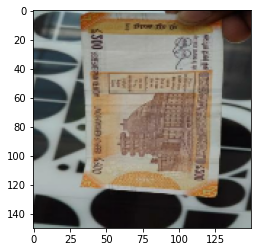

In [119]:
import numpy as np

for image_batch, label_batch in test_ds.take(1):
    
    # reading first image from batch
    first_image = image_batch[0].numpy().astype('uint8')
    
    # reading first image label from batch
    first_label = label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])